In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

### Data import

In [2]:
data = load_breast_cancer(as_frame=True)

### Data preparation

In [3]:
# (separate) X and y
X = data.data
y = data.target

In [4]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True)

In [5]:
# scale the data
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

### Testing of different ML models with cross-validation

In [6]:
# define models to test (for this comparison, default settings are used with every model)
seed = 101
log_model = LogisticRegression(random_state=seed)
SVC_model = SVC(random_state=seed)
KNN_model = KNeighborsClassifier()
GBC_model = GradientBoostingClassifier(random_state=seed)
DT_model = DecisionTreeClassifier(random_state=seed)
RF_model = RandomForestClassifier(random_state=seed)
NB_model = GaussianNB()

In [7]:
# models to use
models = [log_model, SVC_model, KNN_model, DT_model, RF_model, GBC_model, NB_model]

# create a function for model evaluation
def eval_models(models, X_train_sc, y_train):
    # metrics to use
    metrics = ['accuracy', 'precision', 'recall', 'roc_auc']
    
    # empty dataframe for the evaluation scores
    global all_scores_df   # to make the df available outside the function
    all_scores_df = pd.DataFrame()
    
    # loop to do cross validation with all the models
    for m in models:
        scores = cross_validate(m, X_train_sc, y_train, scoring=metrics, cv=5)   # cross-validation
        scores_df = pd.DataFrame(scores)   # creates a df with the results
        scores_df['model'] = str(m)   # adds the name of the model to the df
        all_scores_df = pd.concat([all_scores_df, scores_df], ignore_index=True)
    
    # drop the time columns since those are unnecessary
    all_scores_df = all_scores_df.drop(['fit_time', 'score_time'], axis=1)
    
    # calculate the mean of the scores
    mean_scores_df = all_scores_df.groupby('model').mean()
    
    # calculate standard deviation for the scores and rename columns
    std_scores_df = all_scores_df.groupby('model').std()
    std_scores_df.rename(columns={'test_accuracy':'test_accuracy_std', 'test_precision':'test_precision_std', 
                                  'test_recall':'test_recall_std', 'test_roc_auc':'test_roc_auc_std'}, inplace=True)
    
    # join the two dataframes (mean scores and standard deviation)
    global final_scores_df   # to make the df available outside the function
    final_scores_df = mean_scores_df.merge(std_scores_df, how='inner', left_on='model', right_on='model')

# test the different models
eval_models(models, X_train_sc, y_train)

##### Two dataframes, all_scores_df and final_scores_df (mean and standard deviation of all scores for each model) are two outcomes of the above function.

In [8]:
all_scores_df

,test_accuracy,test_precision,test_recall,test_roc_auc,model
0,0.962500,0.944444,1.000000,0.994591,LogisticRegression(random_state=101)
1,0.962500,0.980000,0.960784,0.995943,LogisticRegression(random_state=101)
2,1.000000,1.000000,1.000000,1.000000,LogisticRegression(random_state=101)
3,0.962025,0.979592,0.960000,0.998621,LogisticRegression(random_state=101)
4,0.987342,0.980392,1.000000,0.998621,LogisticRegression(random_state=101)
5,0.962500,0.944444,1.000000,0.995267,SVC(random_state=101)
6,0.962500,0.980000,0.960784,0.994591,SVC(random_state=101)
7,0.987500,1.000000,0.980000,1.000000,SVC(random_state=101)
8,0.974684,1.000000,0.960000,0.999310,SVC(random_state=101)
9,0.987342,0.980392,1.000000,0.998621,SVC(random_state=101)


In [9]:
final_scores_df

,test_accuracy,test_precision,test_recall,test_roc_auc,test_accuracy_std,test_precision_std,test_recall_std,test_roc_auc_std
model,,,,,,,,
DecisionTreeClassifier(random_state=101),0.924842,0.941213,0.940863,0.919167,0.054332,0.044429,0.053629,0.057396
GaussianNB(),0.944778,0.950542,0.964392,0.988062,0.031348,0.034211,0.035562,0.010236
GradientBoostingClassifier(random_state=101),0.959905,0.965298,0.972314,0.991070,0.023950,0.027995,0.017629,0.008550
KNeighborsClassifier(),0.967405,0.962576,0.988157,0.986734,0.027409,0.036229,0.010812,0.011232
LogisticRegression(random_state=101),0.974873,0.976886,0.984157,0.997555,0.017735,0.020100,0.021696,0.002215
RandomForestClassifier(random_state=101),0.959905,0.968543,0.968392,0.988142,0.028425,0.022660,0.029752,0.012297
SVC(random_state=101),0.974905,0.980967,0.980157,0.997558,0.012461,0.022692,0.019806,0.002460


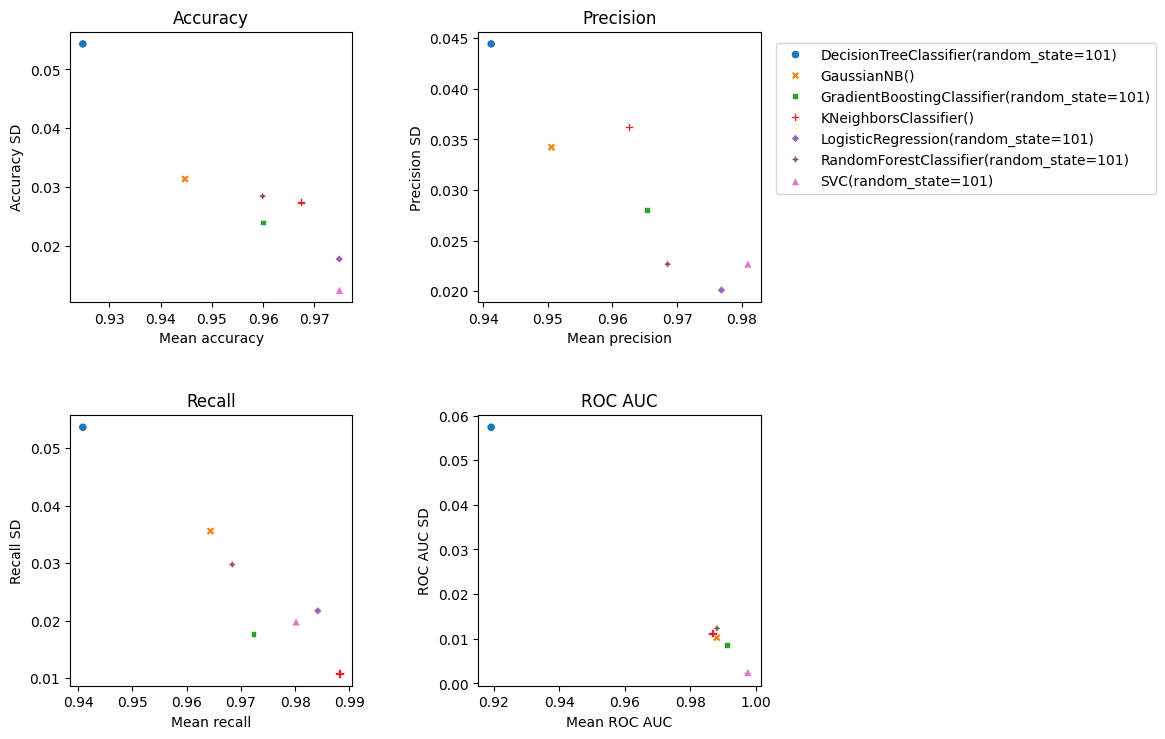

In [10]:
# create a function to plot the results
def plot_results(final_scores_df):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,8.5))
    fig.tight_layout(pad=6)
    
    # accuracy
    sns.scatterplot(data=final_scores_df, x='test_accuracy', y='test_accuracy_std', 
                    hue='model', style='model', ax=ax[0][0])
    ax[0][0].set_title('Accuracy')
    ax[0][0].set_xlabel('Mean accuracy')
    ax[0][0].set_ylabel('Accuracy SD')
    ax[0][0].legend(loc=(2.5, 0.4))
    
    # precision
    sns.scatterplot(data=final_scores_df, x='test_precision', y='test_precision_std', 
                    hue='model', style='model', ax=ax[0][1], legend=False)
    ax[0][1].set_title('Precision')
    ax[0][1].set_xlabel('Mean precision')
    ax[0][1].set_ylabel('Precision SD')
    
    # recall
    sns.scatterplot(data=final_scores_df, x='test_recall', y='test_recall_std', 
                    hue='model', style='model', ax=ax[1][0], legend=False)
    ax[1][0].set_title('Recall')
    ax[1][0].set_xlabel('Mean recall')
    ax[1][0].set_ylabel('Recall SD')
    
    # ROC AUC
    sns.scatterplot(data=final_scores_df, x='test_roc_auc', y='test_roc_auc_std', 
                    hue='model', style='model', ax=ax[1][1], legend=False)
    ax[1][1].set_title('ROC AUC')
    ax[1][1].set_xlabel('Mean ROC AUC')
    ax[1][1].set_ylabel('ROC AUC SD')

# plot the results to compare the performance of different classifiers
plot_results(final_scores_df)

# save the figure
plt.savefig('evaluation_base.jpg', bbox_inches='tight', dpi=300)

##### Based on the above, SVM classification and logistic regression outperforms the other algorithms in all evaluation metrics, except recall. Although with recall KNN provides the best value, this algorithm lags behind with every other metrics and displays a grater standard deviation. In order to train a model that can perform similarly well with new incoming data later on, I would rather choose models with minimal SD (their performance is not too dependent on the actual training set).
##### SVM and logistic regression seem to be two very good options in this case.

<br>

### NOTE!
##### The above models perform very well as they are, however, hyperparameter tuning might help to make small improvements.
##### In addition, feature selection could be quite beneficial even in this situation. There is a relatively large number of features in this setup that could be decreased by selecting only the ones that have a high predictive value. Considering a real world scenario, a lower number of parameters might be much more practical, it could simplify the whole diagnostic process significantly and could result in cost reduction on the clinical side as well. (Not to mention the computational cost.)
##### The same models will be trained and evaluated with the selected feautres, and then compared.

<br>

### Retraining the models after feature selection

In [11]:
# selection of features
# top 10
selFeats_top10 = ['worst concave points', 'worst radius', 'mean concave points', 'worst perimeter', 'mean perimeter', 'worst texture', 
                  'worst area', 'mean radius', 'worst symmetry', 'worst concavity']

# using only the worst metrics
selFeats_worst = ['worst concave points', 'worst radius', 'worst perimeter', 'worst texture', 'worst area', 'worst concavity']

# taking multi-collinearity into account
selFeats_worst_mcol = ['worst concave points', 'worst radius', 'worst texture', 'worst concavity']

##### Since three of the features were very higly correlated (radius, perimeter and area) in all types of metrics I accounted for multi-collinearity and removed perimeter and area to create the last selection of features.

<br>

- Selection of the top 10 features, however, it still may be unnecessary to use that many.

In [12]:
# apply selection on the features
X_sel_top10 = X[selFeats_top10]

In [13]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sel_top10, y, test_size=0.3, random_state=101, shuffle=True)

In [14]:
# scale the data
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

##### I'm using the exact same models as above

In [15]:
# test the different models
eval_models(models, X_train_sc, y_train)

In [16]:
final_scores_df

,test_accuracy,test_precision,test_recall,test_roc_auc,test_accuracy_std,test_precision_std,test_recall_std,test_roc_auc_std
model,,,,,,,,
DecisionTreeClassifier(random_state=101),0.919715,0.947711,0.924863,0.917949,0.036915,0.029732,0.042498,0.037896
GaussianNB(),0.957373,0.972389,0.960471,0.990375,0.022630,0.022289,0.027873,0.009298
GradientBoostingClassifier(random_state=101),0.952405,0.964694,0.960471,0.991148,0.029737,0.028588,0.024018,0.010716
KNeighborsClassifier(),0.972405,0.977533,0.980157,0.994995,0.016250,0.029790,0.019806,0.008036
LogisticRegression(random_state=101),0.974937,0.980886,0.980235,0.997152,0.017622,0.022697,0.024016,0.003144
RandomForestClassifier(random_state=101),0.957373,0.964929,0.968392,0.988702,0.032511,0.028984,0.029752,0.013665
SVC(random_state=101),0.972405,0.980886,0.976235,0.995802,0.016250,0.022697,0.025673,0.004515


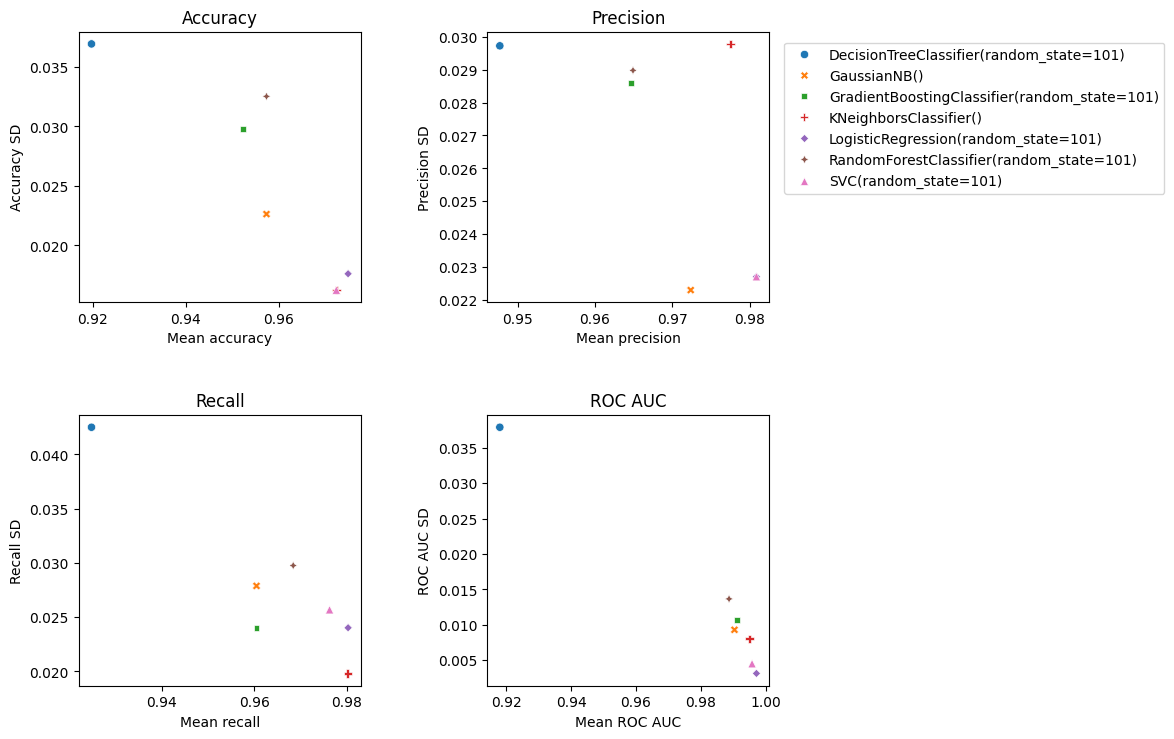

In [17]:
# plot the results to compare the performance of different classifiers
plot_results(final_scores_df)

# save the figure
plt.savefig('evaluation_top10Feats.jpg', bbox_inches='tight', dpi=300)

<br>

- Using only a selection of the worst metrics.

In [18]:
# apply selection on the features
X_sel_worst = X[selFeats_worst]

In [19]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sel_worst, y, test_size=0.3, random_state=101, shuffle=True)

In [20]:
# scale the data
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

##### I'm using the exact same models as above

In [21]:
# test the different models
eval_models(models, X_train_sc, y_train)

In [22]:
final_scores_df

,test_accuracy,test_precision,test_recall,test_roc_auc,test_accuracy_std,test_precision_std,test_recall_std,test_roc_auc_std
model,,,,,,,,
DecisionTreeClassifier(random_state=101),0.932152,0.956906,0.936627,0.930498,0.031404,0.034678,0.045253,0.033154
GaussianNB(),0.949778,0.968484,0.952471,0.991430,0.023409,0.024578,0.029976,0.006691
GradientBoostingClassifier(random_state=101),0.957310,0.969002,0.964314,0.990793,0.028772,0.029053,0.032700,0.011570
KNeighborsClassifier(),0.969873,0.976964,0.976235,0.990997,0.016784,0.020116,0.032544,0.011238
LogisticRegression(random_state=101),0.969842,0.969681,0.984157,0.998096,0.018985,0.027335,0.021696,0.001746
RandomForestClassifier(random_state=101),0.949810,0.968766,0.952549,0.989765,0.038477,0.037312,0.035895,0.011113
SVC(random_state=101),0.967342,0.962212,0.988157,0.996871,0.014254,0.025190,0.017582,0.003536


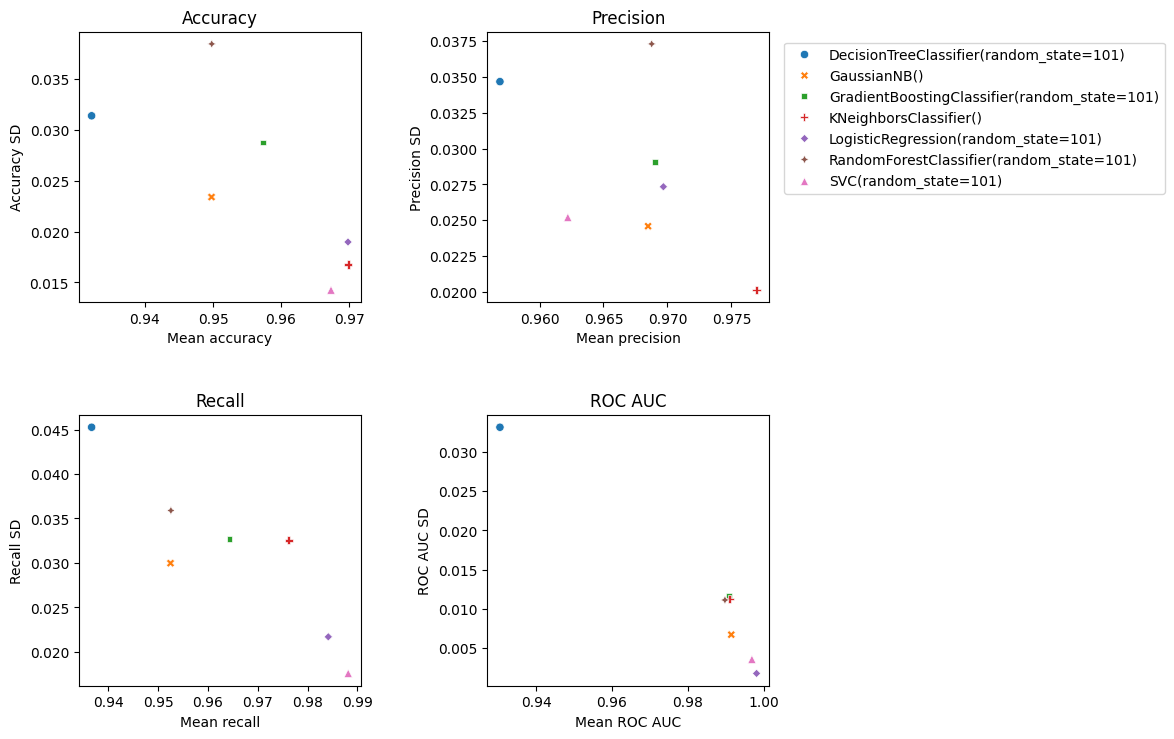

In [23]:
# plot the results to compare the performance of different classifiers
plot_results(final_scores_df)

# save the figure
plt.savefig('evaluation_worstFeats.jpg', bbox_inches='tight', dpi=300)

<br>

- Smallest selection with only four features

In [24]:
# apply selection on the features
X_sel_worst_mcol = X[selFeats_worst_mcol]

In [25]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sel_worst_mcol, y, test_size=0.3, random_state=101, shuffle=True)

In [26]:
# scale the data
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

##### I'm using the exact same models as above

In [27]:
# test the different models
eval_models(models, X_train_sc, y_train)

In [28]:
final_scores_df

,test_accuracy,test_precision,test_recall,test_roc_auc,test_accuracy_std,test_precision_std,test_recall_std,test_roc_auc_std
model,,,,,,,,
DecisionTreeClassifier(random_state=101),0.932278,0.951990,0.940706,0.929204,0.031174,0.022623,0.030758,0.032345
GaussianNB(),0.947278,0.965563,0.952471,0.989653,0.022265,0.034596,0.032791,0.007293
GradientBoostingClassifier(random_state=101),0.962342,0.968929,0.972314,0.992218,0.029282,0.029142,0.022428,0.009765
KNeighborsClassifier(),0.969873,0.973203,0.980157,0.989789,0.016784,0.021229,0.028147,0.012483
LogisticRegression(random_state=101),0.964842,0.962901,0.984157,0.997961,0.018515,0.035632,0.021696,0.002338
RandomForestClassifier(random_state=101),0.947310,0.960763,0.956549,0.990918,0.034584,0.032858,0.025356,0.009286
SVC(random_state=101),0.967373,0.965998,0.984157,0.996881,0.016700,0.026972,0.021696,0.004342


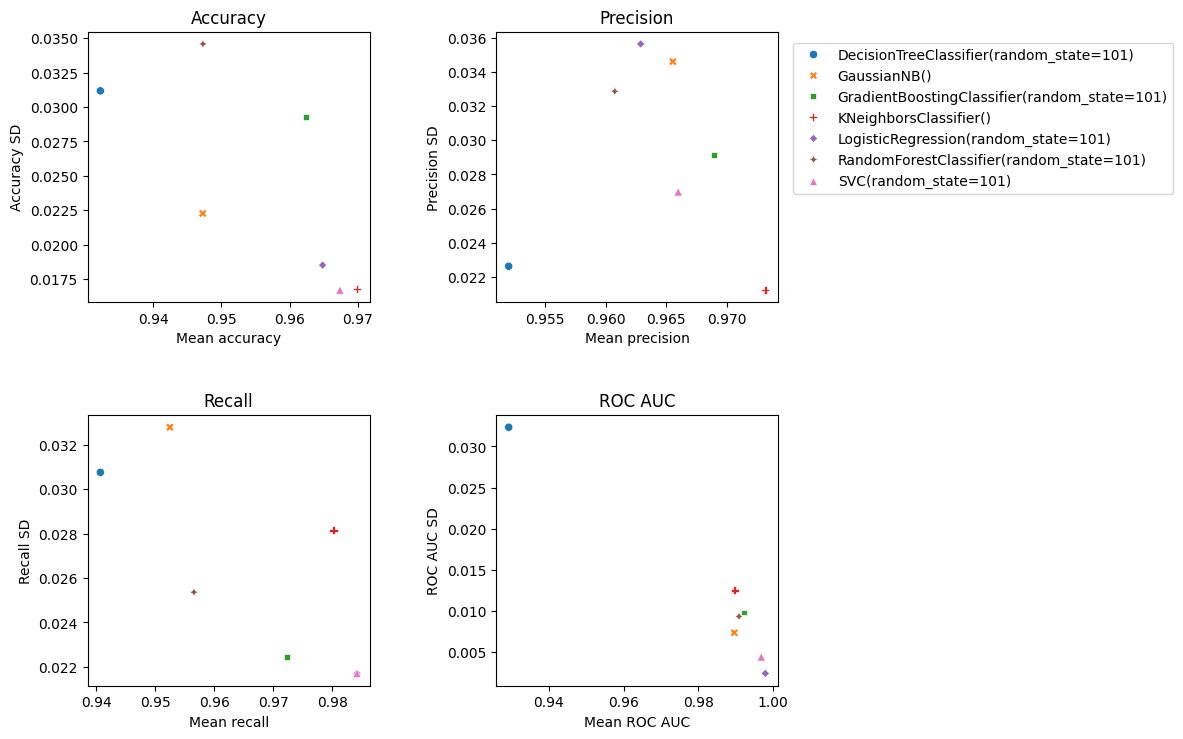

In [29]:
# plot the results to compare the performance of different classifiers
plot_results(final_scores_df)

# save the figure
plt.savefig('evaluation_worstLeastFeats.jpg', bbox_inches='tight', dpi=300)